# Get a corpus of articles

In this exercise let's scrape a web page to get a collection of blog entries and save them as our corpus. On e reason I picked an accessibility blog is that they should use well formed HTML on their web site. This will make it easier for us to find a pattern to use to find blog entries but may not be representative of what one might find out in the "wilds" of the internet. 

In [15]:
import urllib3 as ul3
from bs4 import BeautifulSoup as bs
import certifi
http = ul3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())

It is often helpful to look over the web page source before sorting through it in Jupyter notebooks. The inspect element in a browser, or even downloading the html and looking at it in an editor will make sorting through the markup easier. When you have an idea of what you want to get from it then you can turn to BesutifulSoup and Jupyter Notebook to import the information you need. 

Try visiting the [Paciello group's blog](https://developer.paciellogroup.com/blog/) to find out where we can locate the blog entries.

In [16]:
url = 'https://developer.paciellogroup.com/blog/'

def get_url(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,"lxml")
    return soup

soup = get_url(url)
soup

<!DOCTYPE html>
<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]--><!--[if !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>Blog | TPG – Digital Accessibility Solutions</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, shrink-to-fit=no" name="viewport"/>
<link href="https://developer.paciellogroup.com/feed/" rel="alternate" title="TPG" type="application/rss+xml"/>
<link href="https://developer.paciellogroup.com/feed/atom/" rel="alternate" title="TPG" type="application/atom+xml"/>
<meta content="#1b75bc" name="theme-color"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="icon" sizes="192x192"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="apple-touch-icon"/>
<meta content="The Paciello Group (TPG)" name="a

In [17]:
soup.main

<main>
<article>
<h2><a href="https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/">Describing aria-describedby</a></h2>
<div class="meta">
					Posted on Wednesday, 5 September 2018	by <span class="author vcard">Scott O'Hara</span>
<br/>
<span aria-hidden="true" class="fa fa-comments-o"></span> <a href="https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/#comments">
						4 comments<span class="sr-only"> on: Describing aria-describedby</span>
</a>
</div>
<p>A well-designed user interface (UI) should clearly identify important content and controls. Often people correlate this to using prominent visual cues to help guide individuals through a task or point them to necessary information. However, what may be visually apparent to some could be misunderstood or completely passed over by others. If someone uses assistive […]</p>
<div class="meta more"><a href="https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/">Con

In [13]:
soup.h2.a['href']

'https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/'

We have found the links to the articles on one page but we also need to identify the link to other blog entries.
Look at the `<span>` element with the `class="next"`. This seems to be where we can find the link to the next set of blog articles.

In [19]:
soup.find('span',{"class":"next"})

<span class="next"><a href="https://developer.paciellogroup.com/blog/page/2/">Older posts <span aria-hidden="true" class="fa fa-angle-right"></span></a></span>

## Collect the links for the artices
Now we build a function that will "crawl" through the web pages of the Paciello Group's blog (`developer.paciellogroup.com/blog/`) and give us the links to the blog articles. 

Let's make sense of this function:

In [20]:
links = []
def fetch_links(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    all_h2 = soup.findAll('h2')
    for h in all_h2:
        links.append(soup.h2.a['href'])
    for c in soup.findAll('span'):
        try:
            n = c['class']
            if n == ['next']:
                fetch_links(c.a['href'])
        except:
            n = ""
    return set(links)

In [21]:
links = fetch_links('https://developer.paciellogroup.com/blog/')

In [22]:
# let's see the collection of links
links = [l for l in links]
links

['https://developer.paciellogroup.com/blog/2017/12/how-invert-brightness-can-improve-accessibility-and-help-us-use-our-devices/',
 'https://developer.paciellogroup.com/blog/2009/01/how-can-i-validate-xhtml-aria/',
 'https://developer.paciellogroup.com/blog/2016/04/csun-2016-roundup/',
 'https://developer.paciellogroup.com/blog/2008/09/free-aria/',
 'https://developer.paciellogroup.com/blog/2007/11/fieldsets-legends-and-screen-readers/',
 'https://developer.paciellogroup.com/blog/2014/12/using-aria-describedby-to-provide-helpful-form-hints/',
 'https://developer.paciellogroup.com/blog/2015/02/flipboard-react-canvas-accessibility/',
 'https://developer.paciellogroup.com/blog/2012/08/examples-of-skip-links-on-some-bank-sites/',
 'https://developer.paciellogroup.com/blog/2008/05/making-twitter-tweet-using-the-tpg-notifier/',
 'https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/',
 'https://developer.paciellogroup.com/blog/2014/03/html5accessibility-com-updated/',


In [37]:
# Let's see what one of the links gives us
markup = get_url(links[2])

In [38]:
# remember we saw that the <main> element holds the main content of the page.
markup.main.text
    

'\n\nCSUN 2016 roundup\n\nPosted on Thursday, 21 April 2016 by Henny Swan\n\nCategory: Conferences \n\n\nWe had another great year at CSUN, the annual International Technology and Persons with Disabilities Conference, which is held in San Diego.\nIt’s always good to meet up with the members of the team, colleagues, and friends in the industry, and make new friends. This year TPG had a series of first, but that made it all the better. We welcomed our newest recruits, Michiel Bijl (complete with his dinosaur onesie), Adrian Roselli, and Jon Metz. All the UX team made it to the conference for the first time and helped run the CSUN 2016 UXathon. TPG announced a strategic partnership with NV Access. And last but not least, our fearless leader, Mike Paciello, won the Knowbility lifetime achievement award (29 minutes in).\nTPG was also out in force at various events including the CSUN Tweetup, Wendy Chisholm’s karaoke night, and the Viking and Lumberjack hangout.\nBut it wasn’t all karaoke an

In [39]:
# let's create a function to clean up the text
def get_article_text(article_url):
        req = http.request('GET',article_url)
        page = req.data.decode('utf-8','ignore')
        soup = bs(page,'lxml')
        article = markup.article.text.replace('\n',' ')
        article = article.replace('\xa0',' ')
        return article

In [40]:
a = get_article_text(links[2])

In [41]:
a

' CSUN 2016 roundup  Posted on Thursday, 21 April 2016 by Henny Swan  Category: Conferences    We had another great year at CSUN, the annual International Technology and Persons with Disabilities Conference, which is held in San Diego. It’s always good to meet up with the members of the team, colleagues, and friends in the industry, and make new friends. This year TPG had a series of first, but that made it all the better. We welcomed our newest recruits, Michiel Bijl (complete with his dinosaur onesie), Adrian Roselli, and Jon Metz. All the UX team made it to the conference for the first time and helped run the CSUN 2016 UXathon. TPG announced a strategic partnership with NV Access. And last but not least, our fearless leader, Mike Paciello, won the Knowbility lifetime achievement award (29 minutes in). TPG was also out in force at various events including the CSUN Tweetup, Wendy Chisholm’s karaoke night, and the Viking and Lumberjack hangout. But it wasn’t all karaoke and margaritas—

In [42]:
# let's build the corpus
def get_corpus(ls):
    corp = []
    for a in ls:
         corp.append(get_article_text(a))
    return corp

In [43]:
corpus = get_corpus(links)

In [44]:
corpus

[' CSUN 2016 roundup  Posted on Thursday, 21 April 2016 by Henny Swan  Category: Conferences    We had another great year at CSUN, the annual International Technology and Persons with Disabilities Conference, which is held in San Diego. It’s always good to meet up with the members of the team, colleagues, and friends in the industry, and make new friends. This year TPG had a series of first, but that made it all the better. We welcomed our newest recruits, Michiel Bijl (complete with his dinosaur onesie), Adrian Roselli, and Jon Metz. All the UX team made it to the conference for the first time and helped run the CSUN 2016 UXathon. TPG announced a strategic partnership with NV Access. And last but not least, our fearless leader, Mike Paciello, won the Knowbility lifetime achievement award (29 minutes in). TPG was also out in force at various events including the CSUN Tweetup, Wendy Chisholm’s karaoke night, and the Viking and Lumberjack hangout. But it wasn’t all karaoke and margaritas

In [46]:
# how many articles do we have?
len(corpus)

69

In [47]:
# combine them into one string to create a wordcloud of the corpus
corpus_string = " ".join(corpus)

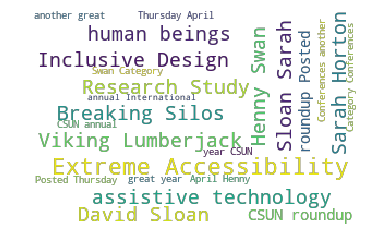

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=300, height=200,min_font_size=8, mode='RGBA', background_color=None).generate(corpus_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()